In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 

In [2]:
train_dataset = h5py.File('C:/Users/Ajinkya/Documents/Cat Identification/train_catvnoncat.h5', "r")
test_dataset = h5py.File('C:/Users/Ajinkya/Documents/Cat Identification/test_catvnoncat.h5', "r")


In [3]:
# Load training data
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

# Load test data
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [4]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_x_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x =test_set_y_orig[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",validation_y.shape)

Validation data shape:  (25, 64, 64, 3)
Test data shape:  (25, 64, 64, 3)


In [5]:
m_train = np.squeeze(train_set_y_orig.shape) 
m_val = np.squeeze(validation_y.shape)
m_test = np.squeeze(test_set_y.shape)
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_test = " + str(m_val))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of validation examples: m_test = [25 64 64  3]
Number of testing examples: m_test = 25
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


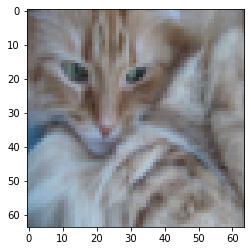

In [6]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


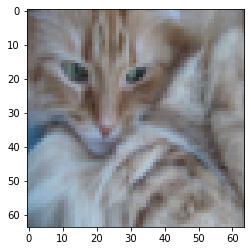

In [7]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [8]:
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [9]:
print("Validation data size: ", validation_x.shape)
print("Validation data size: ", validation_y.shape)

Validation data size:  (25, 64, 64, 3)
Validation data size:  (25, 64, 64, 3)


In [10]:
print("test_set_x shape: ", test_set_x_orig.shape)
print("test_set_y shape: ", test_set_y_orig.shape)

test_set_x shape:  (50, 64, 64, 3)
test_set_y shape:  (50,)


In [11]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
validation_x_flatten = validation_x.reshape(validation_x.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [12]:
print ("train_set_x_flatten shape: ", train_set_x_flatten.shape)
print ("train_set_y shape: ", train_set_y_orig.shape)

print ("validation_x_flatten shape: ", validation_x.shape)
print ("validation_y shape: ", validation_y.shape)

print ("test_set_x_flatten shape: ", test_set_x_orig.shape)
print ("test_set_y shape: ", test_set_y_orig.shape)

train_set_x_flatten shape:  (12288, 209)
train_set_y shape:  (209,)
validation_x_flatten shape:  (25, 64, 64, 3)
validation_y shape:  (25, 64, 64, 3)
test_set_x_flatten shape:  (50, 64, 64, 3)
test_set_y shape:  (50,)


In [13]:
print("Min value: ",train_set_x_flatten.reshape(1,-1).min())
print("Max value: ",train_set_x_flatten.reshape(1,-1).max())

Min value:  0
Max value:  255


In [14]:
train_set_x = train_set_x_flatten / 255.
validation_set_x = validation_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [15]:
print("Standardized Min value: ",train_set_x.reshape(1,-1).min())
print("Standardized Max value: ",train_set_x.reshape(1,-1).max())

Standardized Min value:  0.0
Standardized Max value:  1.0


In [16]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

z = np.linspace(-10,10,2000000)

sigmoid_z = z

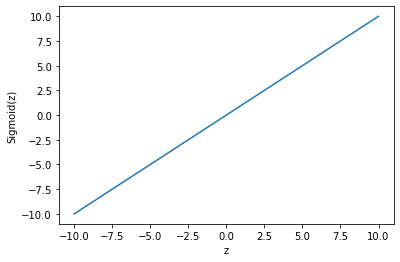

In [17]:
plt.plot(z, sigmoid_z) 
plt.xlabel("z") 
plt.ylabel("Sigmoid(z)") 
plt.show()

In [18]:
def initialize_weights(dim):
    np.random.seed(0)
    w = np.random.rand(dim, 1)
    b = 0    
    return w, b

dim = 2
w, b = initialize_weights(dim)

print("Weights: ",w)
print("Biases: ", b)

Weights:  [[0.5488135 ]
 [0.71518937]]
Biases:  0


In [19]:
x = [1,2,3]

x_log = np.log(x)

a = np.array([[1,2],[3,4]]) 
b = np.array([[10,20],[30,40]]) 

c = np.dot(a,b)
print(c)

[[ 70 100]
 [150 220]]


In [20]:
ones_array = np.ones(shape=(4,4))

In [21]:
sum_of_ones_array = np.sum(ones_array)

In [22]:
def forward_prop(w, b, X, Y):

    # calculate activations
    z = np.dot(w.T, X) + b
    A = sigmoid(z)

    # calculate cost
    m = X.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    cost = np.squeeze(cost)

    return A, cost

In [23]:
def back_prop(X, A, Y):

    # calculate gradients for w,b
    m = X.shape[1]
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)

    grads = {'dw': dw, 'db': db}

    return grads

In [24]:
def propagate(w, b, X, Y):

    #Forward propagation
    A, cost = forward_prop(w, b, X, Y)

    #Backward propagation
    grads = back_prop(X, A, Y)

    return grads, cost

In [25]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)

In [57]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    #Compute probability vector
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_prediction

In [58]:
y_actual = np.array([1,1,1,0,1])
print("y_actual :", y_actual )

y_predicted = np.array([1,0,0,0,1])
print("y_predicted :", y_predicted )

c = np.abs(y_actual  - y_predicted )
print("c:", c)

c_mean = np.mean(c)
print("c_mean:", c_mean)

acc = 100 - (c_mean * 100)
print("acc:", acc)

def get_accuracies(Y_predicted, Y_actual):
    abs_diff = np.abs(Y_predicted - Y_actual)
    accuracy = 100 - np.mean(abs_diff) * 100
    return accuracy

y_actual : [1 1 1 0 1]
y_predicted : [1 0 0 0 1]
c: [0 1 1 0 0]
c_mean: 0.4
acc: 60.0


In [59]:
def optimize(w, b, X, Y, X_val, Y_val, num_iterations, learning_rate):
    prev_train_acc=0
    prev_val_acc=0
    costs=[]
    epoch=0
    final_w = w
    final_b = b

    for i in range(num_iterations):

        #Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        costs.append(cost)
        #Get derivatives
        dw = grads['dw']
        db = grads['db']

        #Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Predict labels for train and validation sets        
        Y_prediction_train = predict(w, b, X)
        Y_prediction_val = predict(w, b, X_val)

        # Get accuracies for the train and validation predictions
        train_acc = get_accuracies(Y_prediction_train, Y)
        val_acc = get_accuracies(Y_prediction_val, Y_val)

        if val_acc > prev_val_acc and train_acc>=val_acc:
            print("*****************************")
            print("Epoch - {} - train accuracy: {} %".format(i,train_acc))
            print("Epoch - {} - val accuracy: {} %".format(i,val_acc))
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            prev_train_acc = train_acc
            prev_val_acc = val_acc
            epoch = i
            final_w = w
            final_b = b

    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    optimal_values = {
        'costs': costs,
        'final w':final_w,
        'final b':final_b,
        'epoch':epoch,
        'Train accuracy':prev_train_acc,
        'Validation accuracy': prev_val_acc,
        'Y_prediction_val': Y_prediction_val,
         'Y_prediction_train': Y_prediction_train,
         'params':params,
         'grads':grads,
    }

    return optimal_values

In [60]:
def model(X_train, Y_train, X_val, Y_val, num_iterations=2000, learning_rate=[0.5]):
    prev_train_acc=0
    prev_val_acc=0

    # Initialize weights and bias
    w, b = initialize_weights(X_train.shape[0])

    best_values = {
        'final w':w,
        'final b':b,
        'Train accuracy':prev_train_acc,
        'Validation accuracy': prev_val_acc,
     }


    for lr in learning_rate:
        print(("-"*30 + "learning_rate:{}"+"-"*30).format(lr))
       # Initialize weights and bias
        w, b = initialize_weights(X_train.shape[0])


        # Optimization
        lr_optimal_values = optimize(w, b, X_train, Y_train, X_val, Y_val, num_iterations, lr)
        if lr_optimal_values['Validation accuracy']>prev_val_acc:
            prev_val_acc = lr_optimal_values['Validation accuracy']
            prev_train_acc = lr_optimal_values['Train accuracy']
            final_lr = lr
            final_w = lr_optimal_values['final w']
            final_b = lr_optimal_values['final b']
            final_epoch = lr_optimal_values['epoch']
            final_Y_prediction_val = lr_optimal_values['Y_prediction_val']
            final_Y_prediction_train = lr_optimal_values['Y_prediction_train']

    best_values['Train accuracy'] = prev_train_acc
    best_values['Validation accuracy'] = prev_val_acc
    best_values['final_lr'] = final_lr
    best_values['final w'] = final_w
    best_values['final b'] = final_b
    best_values['epoch'] = final_epoch
    best_values['Y_prediction_val'] = final_Y_prediction_val
    best_values['Y_prediction_train'] = final_Y_prediction_train

    return best_values

In [61]:
best_values = model(train_set_x, 
                     train_set_y_orig, 
                     validation_set_x, 
                     validation_y, 
                     num_iterations = 2000, 
                     learning_rate = [0.1,0.0001,0.001,0.005])

------------------------------learning_rate:0.1------------------------------


<ipython-input-22-2cc285d1bbb5>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
<ipython-input-22-2cc285d1bbb5>:9: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))


ValueError: operands could not be broadcast together with shapes (1,25) (25,64,64,3) 

In [62]:
Y_prediction_test = predict(best_values['final w'], best_values['final b'], test_set_x)

test_acc = get_accuracies(test_set_y, Y_prediction_test)
print("Test accuracy is: ",test_acc)

print("Final best model:")
print("For Learning rate:" ,best_values['final_lr'], ", Epoch - ",best_values['epoch'])
print("Train accuracy: ", best_values['Train accuracy'])
print("Validation accuracy: ",best_values['Validation accuracy'])
print("Test accuracy is: ",test_acc)

NameError: name 'best_values' is not defined

NameError: name 'Y_prediction_test' is not defined

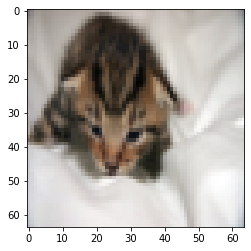

In [63]:
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,1].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][1]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

NameError: name 'Y_prediction_test' is not defined

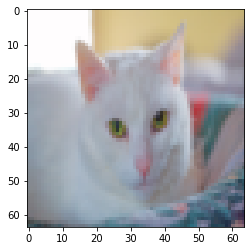

In [64]:
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,2].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][2]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

NameError: name 'Y_prediction_test' is not defined

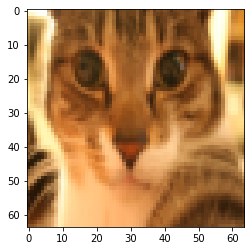

In [65]:
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,3].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][3]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

NameError: name 'Y_prediction_test' is not defined

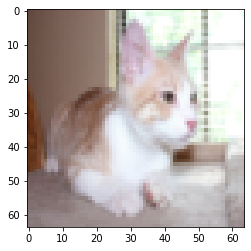

In [66]:
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,4].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][4]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value